<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/KMeansCluster_Analyzing_Zip_Code_Business_Patterns_jgkorman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLPP22 // Assignment #3**

assigned : **Mar 2, 2022**

DUE : **Mar 8, 2022 11:59pm**

## Zip Codes Business Patterns: economic trends across geographies

<img src="https://larrylittlefield.files.wordpress.com/2017/08/retsmall2015new.png" width=300>

---

*Your goal for this assignment will be to identify spatio-temporal trends in the number of businesses per zip code.*

<b>

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.


2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

---

### **PART 1 - Background**

<b>

  <u>In your own words</u>, provide a brief (no more than 500 words) descriptive overview of [zipcode business patterns (ZBP)](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html) data and outcomes including:

1. how and why the data are collected
  
2. what information the raw data contains

3. how zip codes business patterns (ZBP) data has been used by researchers and practitioners

4. limitations of the data

Please include *references* within the description via weblinks.

</b>

[Zipcode business patterns are crucial for businesses as they provide annual statistics for businesses with paid employeez within the US at the zip code level.](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html) The information contained in Zip code business patterns includes the number of establishments, employment, first quarter payrolls, and annual payrolls. [With that said, the data do have some limitations to them ](https://www.caliper.com/learning/articles/what-are-zip-code-business-patterns/)as the data excludes data on self-employed individuals, employees of private households, railroad employees, agricultrual production employees, and the majority of government employees. 

[Zip code business patterns are also part of the "County Business Patterns" produt that are released annually by the US Census Bureau. ](https://www.caliper.com/learning/articles/what-are-zip-code-business-patterns/). These data provide the same information as the zip code business patterns do.

In general, the data both zip code business patters along with county business patterns are are[ useful for studying the economic activity of small areas](https://www.caliper.com/learning/articles/what-are-zip-code-business-patterns/) along with analyzing economic changes that occur over time. Overall, zip code business patterns allow for a granular level take on economic activity in a localized way that enables the researcher the ability analyze how small communities are doing.  

Zip code business patterns have been used by resaerchers and practicioners alike in a multitude of capacities. A report from the [New York City Comptroller ](https://comptroller.nyc.gov/wp-content/uploads/documents/The_New_Geography_of_NYC_Business.pdf) used zip code business patterns for policy recommendations and analysis to examine the new geography of NYC businessess which helped to elucideate the business outcoems in lower and higher income neighborhoods alike along with see patterns of gentrification that may be taking place. In another [fascinating study](https://www.prc.gov/sites/default/files/archived/Effects_of_POs_Report.pdf), researchers used business zip code patterns and the data that lie within them to analyze the economic effects of post offices as they vary in how close they are to a community. Overall, studies that have employed the use of zip code business patterns have been able to find intriguing and important results as a result of the outcomes of their analysis. 

At the end of the day, it is important to understand the microeconomy as well in combination with the macroeconomy. While macroeconomic indicators are easy to come by -- microeconomic indicators on the other hand are not so easy to come by. Through the use of researchers employing zip code business pattern data -- researchers are able to overcome the problem of a lack of robust and identifiable microeconoimc data and patterns to produce mircoeconomic research that can have a true impact on policy at the local level. 




### **PART 2 - Loading and visualizing the data**

<b> Load the pre-cleaned NYC zipcode business patterns data (in the `mlpp22/data/zbp/` folder) into a pandas DataFrame. </b>

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fname = "/content/drive/MyDrive/mlpp22/data/zbp/nyc_zbp_est_total_2000_2012_clean.csv"
zip1 = pd.read_csv(fname)
zip1

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,-73.996930,40.750213
1,10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,-73.985677,40.716152
2,10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,-73.988850,40.731947
3,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.012847,40.703472
4,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.040777,40.698767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.832606,40.607089
242,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.811580,40.587210
243,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.840021,40.630053
244,11694,288,301,302,302,303,317,315,332,328,317,330,326,326,-73.851767,40.575181


Note that this DataFrame has the zipcode, number of establishments in a given year from 2000 to 2012, and the latitude/longitude of the zip codes.


<b>Extract the data for the number of establishments per zipcode per year from the DataFrame using the `.values` attribute so that you have a rectangular 2D `numpy` array that has *N*$_{\rm rows}$ $\times$ *N*$_{\rm cols}$ where *N*$_{\rm rows}$ is the number of zipcodes and *N*$_{\rm cols}$ is number of years.</b>

In [ ]:
cols = zip1.columns[1:14]
zip_np = zip1[cols].values
zip_np

array([[7317, 7188, 7141, ..., 7241, 7227, 7235],
       [2277, 2543, 2269, ..., 2872, 2912, 2954],
       [3683, 3602, 3616, ..., 4113, 4159, 4214],
       ...,
       [  79,   89,   94, ...,  132,  131,  129],
       [ 288,  301,  302, ...,  330,  326,  326],
       [  39,   40,   37, ...,   48,   46,   49]])

In [ ]:
zip_np.shape

(246, 13)

<b> Create a numpy array `years` for the values of the years between 2000 and 2012 using the `np.arange()` function. </b>

In [ ]:
years = np.arange(2000,2013)
years.shape
years.shape

(13,)

<b>Make a heat map of the raw NYC data using matplotlib's `imshow()` function with an `aspect` equal to "auto", `interpolation` equal to "nearest", and color limits `clim` of 0 to 3000$^{\dagger}$ (make sure to use a colorbar and label both it and your x-axis).</b>

<small>$^{\dagger}$ this means that the values $\leq0$ will have the lowest color value in your heat map and values $\geq3000$ will have the maximum color value in your heat map.

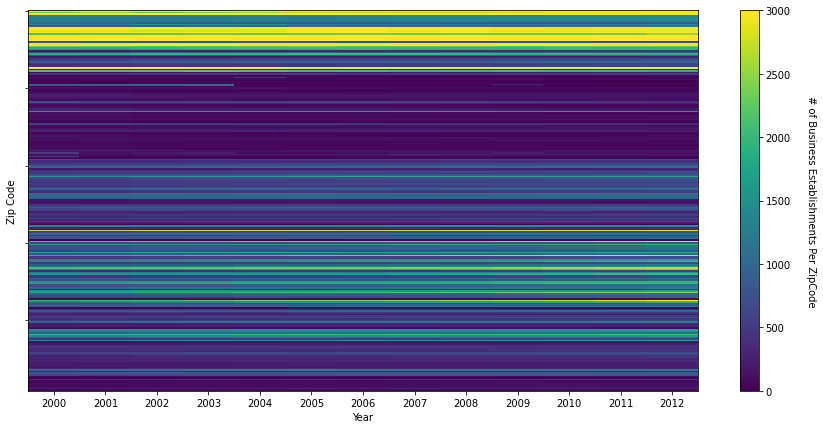

In [ ]:
# -- initialize the figure
fig, ax = plt.subplots(figsize=(15, 7))

# -- plot all time series with a "heatmap"
im = ax.imshow(zip_np, aspect='auto', interpolation='nearest', vmin=0, vmax=3000)

# -- xt = how many ticks we want 
# -- set the x-axis ticks to be years
xt = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels("")

# -- set the axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Zip Code')


# -- set the colorbar and label
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('# of Business Establishments Per ZipCode', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25

# -- show the figure
fig.show()

<b> Is this heat map informative?  Why or why not?  What information can you glean from it? </b>

**Figure 1** above plots a heatmap with the year across the x-axis and the various zip codes of our dataset across the y axis for NYC zipcode business patterns. The heatmap is filled in with the # of business establishments per zip code color coded via a color bar from dark blue (the lowest # of business establishments) to yellow (the highest # of business establishments) with a minimum and maximum range of business establishments filled in by color from 0 to 3000 for business establishments in a given zip code. Overall, the heat map is not very informative. It appears across time and across zip codes -- we have very little intra-zip code change in terms of the number of business establishments a given zip code has. We can't really gain to much information from this heat map unfortunately. 

<b> Standardize the NYC values across features (time steps).  Generate a new heatmap with color limits -2 to 2. </b>

In [ ]:
# -- now let's standardize features
zip_np_st = (zip_np - zip_np.mean(axis=1, keepdims=True)) / zip_np.std(axis=1, keepdims=True)
zip_np_st

array([[ 0.16133494, -0.85964129, -1.23162487, ..., -0.44017043,
        -0.55097405, -0.4876577 ],
       [-1.68710279, -0.44529746, -1.72445032, ...,  1.09061967,
         1.27735731,  1.47343184],
       [-1.09431562, -1.4806094 , -1.41384257, ...,  0.95637976,
         1.17575647,  1.43805472],
       ...,
       [-1.67294227, -1.11242037, -0.83215943, ...,  1.29782377,
         1.24177158,  1.1296672 ],
       [-1.96866513, -0.99868143, -0.9240673 , ...,  1.16512834,
         0.86667182,  0.86667182],
       [-1.36459632, -1.13420993, -1.8253691 , ...,  0.70888121,
         0.24810842,  0.9392676 ]])

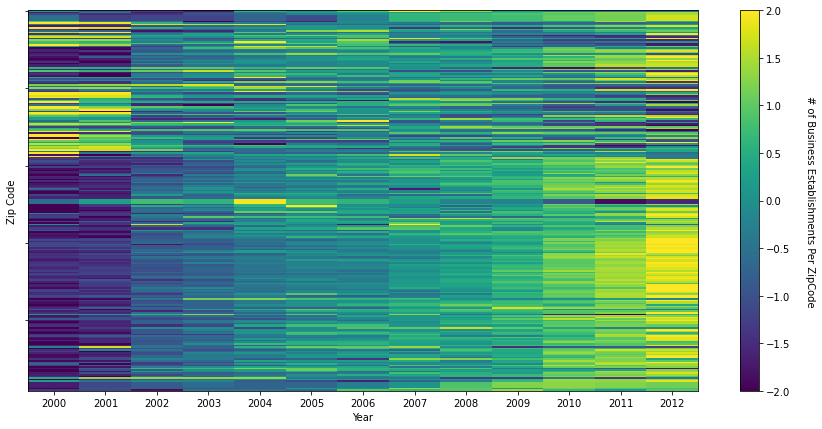

In [ ]:
# -- initialize the figure
fig, ax = plt.subplots(figsize=(15, 7))

# -- plot all time series with a "heatmap"
im = ax.imshow(zip_np_st, aspect='auto', interpolation='nearest', vmin=-2, vmax=2)

# -- set the x-axis ticks to be years
xt = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels("")



# -- set the axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Zip Code')


# -- set the colorbar and label
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('# of Business Establishments Per ZipCode', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25

# -- show the figure
fig.show()

<b> Is this NEW heat map informative?  Why or why not?  What information can you glean from it?  Is there a trend across zipcodes that can be discerned here?  Are there multiple trends? </b>

**Figure 2** above plots a heatmap with the year across the x-axis and the various zip codes of our dataset across the y axis for NYC zipcode business patterns. In figure 2, however, the data is standardized. The heatmap is filled in with the # of business establishments per zip code [standardized] color coded via a color bar from dark blue (the lowest # of business establishments) to yellow (the highest # of business establishments) with a minimum and maximum range of business establishments filled in by color from -2 to 2 for business establishments in a given zip code. Overall, this heat map is much more informative as opposed to figure 1. We can clearly see that from the base year of 2000 on the far left-hand of the x-axis -- that as we move across the range of the x-axis covering the years 2000 to 2012 -- that the more time goes by -- the more business establishments appear to be popping up in almost all zip codes with very few zip codes showing a reversion over time. Thus, this tells us that business is alive and well in NYC and is growing over time! Suggesting that NYC is garnering more and more economic activity within its boundaries overall! 

The most interesting thing this heat map tells us is that during the years of 9/11 in 2000 and 2001 -- there is the least amount of business estabilshments -- but once the recovery became well underway --> business recovered and business establishments began to open up and business in NYC began to grow again! 

### **PART 3 - Clustering NYC data**

<b> Using scikit-learn's `KMeans` model, cluster the standardized NYC data into 4 clusters setting `random_state` equal to 2. </b>

In [ ]:
# -- cluster with 4 clusters
km = KMeans(n_clusters=4, random_state=2)
km.fit(zip_np_st)

KMeans(n_clusters=4, random_state=2)

In [ ]:
clust0 = km.labels_ == 0
clust0 = zip_np_st[clust0]
clust0

array([[ 0.16133494, -0.85964129, -1.23162487, -1.68275391,  0.5808058 ,
         0.12176222,  0.9369603 ,  1.99750925,  1.38808933,  0.06636041,
        -0.44017043, -0.55097405, -0.4876577 ],
       [ 0.39148139, -0.95023209, -1.32035995,  0.11388549,  1.82572683,
         1.59439692, -0.02491245, -0.76516816, -0.25624236, -1.32035995,
        -0.76516816,  0.39148139,  1.08547112],
       [-1.97620574, -1.95128753, -0.6555406 ,  0.69004274,  1.26316157,
         0.88938842,  0.839552  ,  0.46577885, -0.10733998,  0.06708749,
         0.96414305, -0.30668566, -0.18209461],
       [-1.65624959, -2.08730554,  0.02486861,  0.1110798 ,  0.80076932,
         1.36114206,  0.95163891,  1.0162973 ,  0.54213575,  0.04642141,
        -0.06134258,  0.02486861, -1.07432406],
       [-1.78669872, -2.31699743, -0.30186234,  0.12237662,  0.65267533,
         0.22843637,  0.75873507,  0.33449611,  0.33449611,  0.33449611,
        -0.40792208,  0.44055585,  1.60721301],
       [-1.28747134, -1.503434

In [ ]:
clust1 = km.labels_ == 1
clust1 = zip_np_st[clust1]
clust1

array([[ 0.98232795, -0.31518544, -0.48591088, -1.9882948 , -1.10052249,
        -1.51026356,  0.02626545,  0.5042967 ,  1.1189083 ,  0.53844179,
         0.26528108,  1.46035919,  0.5042967 ],
       [ 2.46750296,  1.89717378,  0.61741076, -0.38414291, -0.28676964,
        -0.27285917, -0.2172173 , -0.37023245, -0.62062087, -0.85709882,
        -0.6484418 , -0.77363601, -0.55106853],
       [ 2.06482353,  1.73012645,  0.48505331, -0.05046202,  0.13696834,
         0.15035623, -0.02368625, -1.3490867 , -0.65291677, -1.48296553,
        -0.90728655, -0.35838334,  0.25745929],
       [ 1.59519312,  2.48118739, -0.86236391, -0.84925194,  0.98080387,
        -0.70314718, -0.60199773, -0.55516928, -0.42966904, -0.551423  ,
        -0.42217648, -0.17679541,  0.0948096 ],
       [ 2.04606985,  1.45832084, -0.62492288, -0.71635051, -0.23309021,
        -0.10247932,  0.78567475,  0.64200277,  0.46567806, -0.41594546,
        -0.57920907, -1.01022501, -1.71552383],
       [ 2.05420651,  2.054206

In [ ]:
clust2 = km.labels_ == 2
clust2 = zip_np_st[clust2]
clust2

array([[-1.68710279, -0.44529746, -1.72445032, ...,  1.09061967,
         1.27735731,  1.47343184],
       [-1.09431562, -1.4806094 , -1.41384257, ...,  0.95637976,
         1.17575647,  1.43805472],
       [-0.52205379, -1.23564409, -1.14454745, ...,  1.05695453,
         1.14805117,  1.72499652],
       ...,
       [-1.67294227, -1.11242037, -0.83215943, ...,  1.29782377,
         1.24177158,  1.1296672 ],
       [-1.96866513, -0.99868143, -0.9240673 , ...,  1.16512834,
         0.86667182,  0.86667182],
       [-1.36459632, -1.13420993, -1.8253691 , ...,  0.70888121,
         0.24810842,  0.9392676 ]])

In [ ]:
clust3 = km.labels_ == 3
clust3 = zip_np_st[clust3]
clust3.shape

(33, 13)

<b> Make a four panel plot <small>(see [this stackoverflow question](https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib) for guidance)</small>, one for each cluster center, showing the cluster center and its members.   Put the number of zipcodes belonging to that cluster as the title of each axis. Make sure to use proper values for the x-axis and axis labels for the axes.</b>

In [ ]:
# -- add the cluster center label as a column in the DataFrame
zip1["cluster"] = km.labels_.astype(str)
zip1['cluster'].value_counts()

2    171
3     33
0     23
1     19
Name: cluster, dtype: int64

Extracting out the cluster members to get a count of how many zip codes per cluster

In [ ]:
cluster1 = zip1[zip1['cluster'] == '0']
cluster2 = zip1[zip1['cluster'] == '1']
cluster3 = zip1[zip1['cluster'] == '2']
cluster4 = zip1[zip1['cluster'] == '3']

cluster1np = cluster1[cluster1.columns[1:14]]
cluster1np = cluster1np.values

cluster2np = cluster2[cluster2.columns[1:14]]
cluster2np = cluster2np.values

cluster3np = cluster3[cluster3.columns[1:14]]
cluster3np = cluster3np.values

cluster4np = cluster4[cluster4.columns[1:14]]
cluster4np = cluster4np.values


In [ ]:
print(cluster1['zip'].nunique())
print(cluster2['zip'].nunique())
print(cluster3['zip'].nunique())
print(cluster4['zip'].nunique())

23
19
160
31


In [ ]:
c1 = km.cluster_centers_[0]
c2 = km.cluster_centers_[1]
c3 = km.cluster_centers_[2]
c4 = km.cluster_centers_[3]
c1

array([-1.59009283, -1.6424786 , -0.45675844,  0.02854166,  0.6910265 ,
        0.80447651,  0.51135825,  0.65516006,  0.4036976 ,  0.15473991,
        0.20355832,  0.09619394,  0.1405771 ])

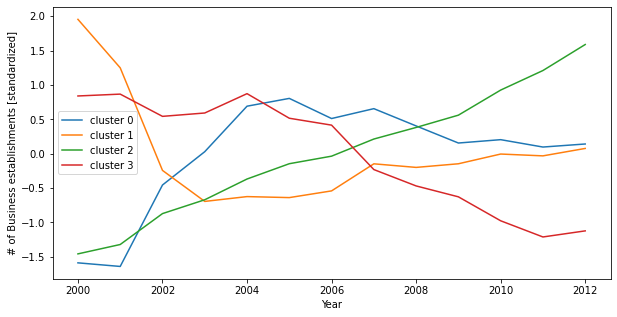

In [ ]:
# -- plot the cluster centers
fig, ax = plt.subplots(figsize=(10, 5))
lins = ax.plot(years, km.cluster_centers_.T)
ax.set_xlabel("Year")
ax.set_ylabel("# of Business establishments [standardized]")
ax.legend(lins, ["cluster 0", "cluster 1", "cluster 2", "cluster 3"])
fig.show()

**Figure 3** above plots the 4 different cluster centers as derived from our KNN model of the number of business establishments [standardized] from the years 2000 through 2012.

**Plotting the 4 panel plot that contains the cluster members and their respective cluster centers**

Text(0, 0.5, '# of Business establishments/zipcode [standardized]')

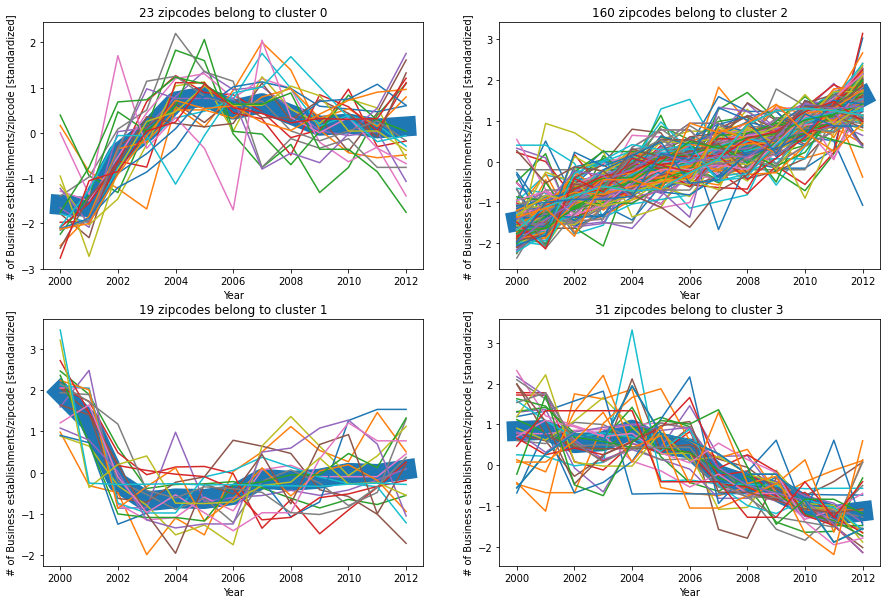

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))


ax[0, 0].plot(years, c1, lw=20)
ax[0, 0].plot(years, clust0.T)

ax[1, 0].plot(years, c2, lw=20)
ax[1, 0].plot(years, clust1.T)

ax[0, 1].plot(years, c3, lw=20)
ax[0, 1].plot(years, clust2.T)

ax[1, 1].plot(years, c4, lw=20)
ax[1, 1].plot(years, clust3.T)


ax[0, 0].set_title('23 zipcodes belong to cluster 0')
ax[1, 0].set_title('19 zipcodes belong to cluster 1')
ax[0, 1].set_title('160 zipcodes belong to cluster 2')
ax[1, 1].set_title('31 zipcodes belong to cluster 3')

ax[0, 0].set_xlabel('Year')
ax[1, 0].set_xlabel('Year')
ax[0, 1].set_xlabel('Year')
ax[1, 1].set_xlabel('Year')

ax[0, 0].set_ylabel('# of Business establishments/zipcode [standardized]')
ax[1, 0].set_ylabel('# of Business establishments/zipcode [standardized]')
ax[0, 1].set_ylabel('# of Business establishments/zipcode [standardized]')
ax[1, 1].set_ylabel('# of Business establishments/zipcode [standardized]')

**Figure 4** above plots the 4 different cluster centers and their members in a panel plot as derived from our KNN model of the number of business establishments [standardized] from the years 2000 through 2012.

In [ ]:
zip1

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude,cluster
0,10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,-73.996930,40.750213,0
1,10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,-73.985677,40.716152,2
2,10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,-73.988850,40.731947,2
3,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.012847,40.703472,2
4,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.040777,40.698767,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.832606,40.607089,2
242,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.811580,40.587210,2
243,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.840021,40.630053,2
244,11694,288,301,302,302,303,317,315,332,328,317,330,326,326,-73.851767,40.575181,2


**NOTE** I did step 1 below in the analysis up above in cell 16 adding the cluster lables back to the df

<b> Make a choropleth of the cluster labels with the following steps:

1. Add the cluster labels back to your zipcode business pattern DataFrame, converting them to strings using `.astype(str)` as you do.
2. Load the NYC zipcode shapes from the `mlpp22/data/zipcode_shapes/nyc/` folder using `geopandas`.
3. Merge the zipcode business patterns DataFrame into the zipcode shapes GeoDataFrame.
4. Make a choropleth of the cluster labels using the merged GeoDataFrame's `.plot()` method and setting `cmap` to be a [perceptually uniform sequential](https://matplotlib.org/stable/tutorials/colors/colormaps.html) colormap.

Besure to include a legend for your choropleth.

</b>

In [ ]:
zip1['zip'] = zip1['zip'].astype(str)

In [ ]:
fname = "/content/drive/MyDrive/mlpp22/data/zipcode_shapes/nyc/ZIP_CODE_040114.shp"
geozip = gp.read_file(fname)
geozipmerged = geozip.merge(zip1, left_on='ZIPCODE', right_on='zip')
geozipmerged

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude,cluster
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,80,84,90,92,98,101,95,-73.796503,40.675872,2
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,565,556,592,621,675,674,726,-73.936327,40.671156,2
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,570,587,602,647,699,713,721,-73.913077,40.662813,2
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,499,514,520,543,580,597,623,-73.953960,40.663115,2
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,1331,1377,1397,1457,1474,1523,1605,-73.976451,40.643320,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,...,6269,6167,6098,6003,5974,6043,6118,-73.989840,40.759351,3
282,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,...,459,463,447,431,438,438,434,-73.845002,40.658262,3
283,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,...,460,472,466,464,485,470,495,-74.115636,40.633357,2
284,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,...,17,17,18,19,21,15,21,-73.951315,40.769629,3


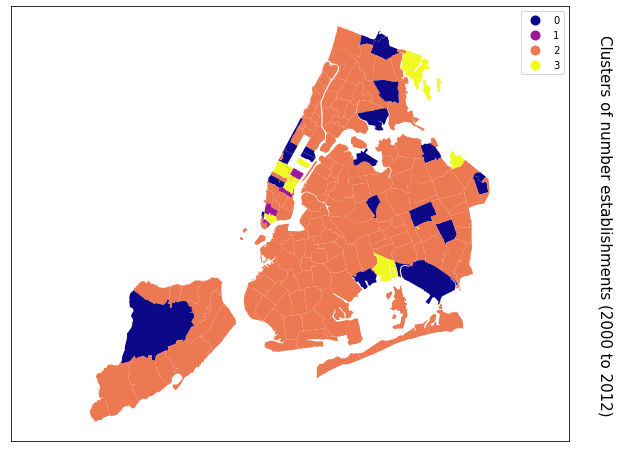

In [ ]:

fig, ax = plt.subplots(figsize=(10, 8))
geozipmerged.plot("cluster", ax=ax, cmap="plasma", legend=True)
ax.grid(0)
ax.axis("equal")
ax.set_xticks([])
ax.set_yticks([])
fig.text(0.95, 0.5, "Clusters of number establishments (2000 to 2012)", 
         fontsize=15, va="center", ha="center", rotation=-90)
fig.show()

**Figure 5** plots a choropleth map of the various labels for each zipcode for which zip ocodes fall into their respective cluster center for the years 2000 to 20120

[]

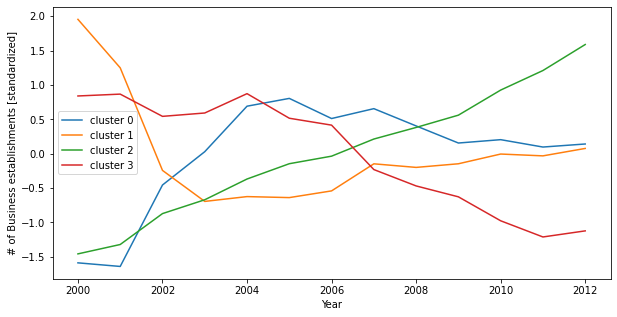

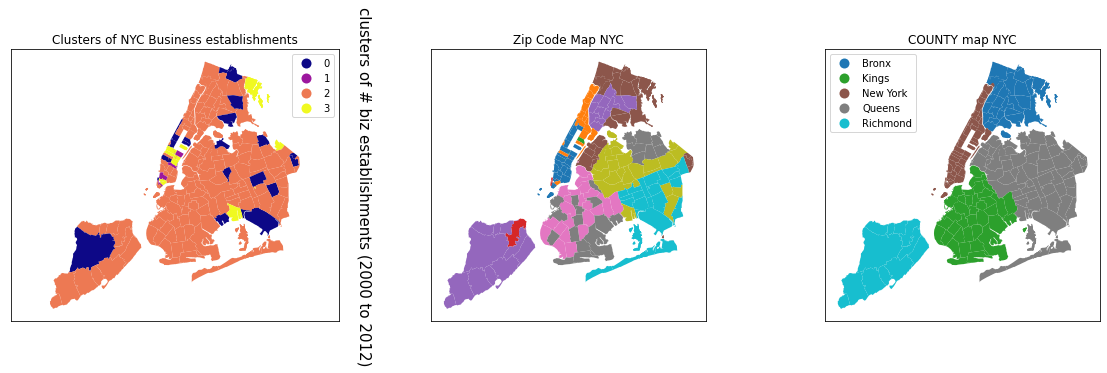

In [ ]:
# -- plot the cluster centers
fig, ax = plt.subplots(figsize=(10, 5))
lins = ax.plot(years, km.cluster_centers_.T)
ax.set_xlabel("Year")
ax.set_ylabel("# of Business establishments [standardized]")
ax.legend(lins, ["cluster 0", "cluster 1", "cluster 2", "cluster 3"])
fig.show()


fig, ax = plt.subplots(1, 3, figsize=(20, 5))

geozipmerged.plot("cluster", ax=ax[0], cmap="plasma", legend=True)
ax[0].grid(0)
ax[0].axis("equal")
ax[0].set_title('Clusters of NYC Business establishments')
ax[0].set_xticks([])
ax[0].set_yticks([])
text = fig.text(0.37, 0.5, "clusters of # biz establishments (2000 to 2012)", 
         fontsize=15, va="center", ha="center", rotation=-90)
fig.show()

##################################

geozipmerged.plot('ZIPCODE', ax=ax[1])
text1 = ax[1].set_title('Zip Code Map NYC')
ax[1].set_xticks([])
ax[1].set_yticks([])
#####################################

geozipmerged.plot('COUNTY', ax=ax[2], legend=True, legend_kwds={'loc': 'upper left'})
text1 = ax[2].set_title('COUNTY map NYC')
ax[2].set_xticks([])
ax[2].set_yticks([])


############################################



**Figure 6** plots the same choropleth as in figure 5 but on a panel plot that includes a geospatial map of zip codes in NYC along with a COUNTY map of NYC for which counties (districts) sit where along with the time series of our cluster centers to see thier trends over time. Figure 6 is designed in order to analyze the impact of figrue 5 in a spatially aware manner.

<b> Given the shape of the cluster centers, and comparing this with a map of NYC zipcodes to orient yourself spatially, how do you interpret this choropleth?  What does this plot tell you about spatio-temporal trends in the number of businesses in NYC?  What are two possible reasons for the patterns visible in this plot?</b>

Given the shape of the clusters and comparing the various plots in figure 6 for spaitla orientation -- i interpret the choropleth of clusters for business establishments in NYC found in both figure 5 and figure 6 in the following way: For the majority of zipcodes that lie within NYC -- as a whole -- NYC is experiencing more and more business establishments within its jurisdiction as is evident by the sheer magnitude of cluster 2 in the choropleth map relative to all other clusters. Thus, on a whole, business across all districts and zip codes in NYC appears to be on an uptrend which also confirms what we saw in our heatmap plots in figure 2. However, it is also evident that the Manhattan district which has a lot of cluster labels in 0, 1, and 3 suggests to us that the number of new business estalblishments in NYC in Manhattan is stagnating where in terms of new openinings wheras the extreme amount of concentration of yellow cluster 3's in the Manhattan region which our KNN model identified as clusters in a downtrend is most likely the result of 9/11. 

Ovearll, this plot tells us that the spatio-temporal trends of business establishments in NYC is increasing as a whole but this increase is largely taking place in all other distrcits aside from the Manhattan district meanwhile the Manhattan district is remaining stagnant in some zipcodes while also increasing in others. Two possibel reasons for this include the fact that the other boroughs were all less impacted by both the dual exogonous shocks to the NYC system of 9/11 and the 2008 financial crisis. Thus -- overall, what this map shows is all districts relative to Manhattan have seen more robust growth in the number of business establishments over time. 

Another intresting observation is what we see in the spatio-temporal cluster map of business establishments surrounding the JFK airport area in the Queens district with a large blue cluster 0 and clusters that are in cluster 3 shown in yellow. Both of these clusters have a trend of either stagnating business establishment presence over time or down right declining as in the case of cluster 3 the yellow cluster. Both of these again are most likely a result of the shock of 9/11 to the NYC travel system along with the impact of the 2008 finanical crisis where there is simply just not as much business travel going to NYC due to the depressed economic activity that arose for several years from the 2008 financial crisis. 

### **PART 4 - Clustering the full US sample**

<b> Load the pre-cleaned full US zipcode business patterns data (also in the `mlpp22/data/zbp/` folder) into a pandas DataFrame. </b>

In [ ]:
fname = "/content/drive/MyDrive/mlpp22/data/zbp/all_zbp_est_total_2000_2012_clean.csv"
USzip = pd.read_csv(fname)
USzip

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31599,99923,7,7,8,8,7,8,7,5,5,6,6,6,5,-130.040519,55.981117
31600,99925,26,24,21,22,20,19,23,23,22,25,19,20,24,-132.976265,55.557671
31601,99926,15,15,14,15,15,14,15,13,13,12,14,13,13,-131.490108,55.127000
31602,99927,2,3,3,2,2,3,1,3,2,2,2,3,3,-133.378427,56.250473


<b> Remove all zipcodes (rows) that have standard deviation equal to 0 across the number of establishments columns. </b>


In [ ]:
USzip.columns

Index(['zip', 'N_est_2000', 'N_est_2001', 'N_est_2002', 'N_est_2003',
       'N_est_2004', 'N_est_2005', 'N_est_2006', 'N_est_2007', 'N_est_2008',
       'N_est_2009', 'N_est_2010', 'N_est_2011', 'N_est_2012', 'longitude',
       'latitude'],
      dtype='object')

In [ ]:
SD0USzip = USzip[USzip.columns[1:14]]
SD0USzip['STD0'] = SD0USzip.std(axis=1)
SD0USzip

STD0 = SD0USzip['STD0']
USzip['STD0'] = STD0
USzip


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude,STD0
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555,25.352641
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901,11.522553
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919,1.690850
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184,5.171420
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683,10.613248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31599,99923,7,7,8,8,7,8,7,5,5,6,6,6,5,-130.040519,55.981117,1.126601
31600,99925,26,24,21,22,20,19,23,23,22,25,19,20,24,-132.976265,55.557671,2.267383
31601,99926,15,15,14,15,15,14,15,13,13,12,14,13,13,-131.490108,55.127000,1.037749
31602,99927,2,3,3,2,2,3,1,3,2,2,2,3,3,-133.378427,56.250473,0.650444


In [ ]:
std0 = USzip['STD0'] != 0
SD0USzip = USzip[std0]
SD0USzip

FinalUSzip = SD0USzip.drop(columns='STD0')
FinalUSzip


,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31599,99923,7,7,8,8,7,8,7,5,5,6,6,6,5,-130.040519,55.981117
31600,99925,26,24,21,22,20,19,23,23,22,25,19,20,24,-132.976265,55.557671
31601,99926,15,15,14,15,15,14,15,13,13,12,14,13,13,-131.490108,55.127000
31602,99927,2,3,3,2,2,3,1,3,2,2,2,3,3,-133.378427,56.250473


<b>Again, extract the data for the number of establishments per zipcode per year from the US DataFrame using the `.values` attribute so that you have a rectangular 2D numpy array that has  *N*$_{\rm rows}$ $\times$ *N*$_{\rm cols}$ where *N*$_{\rm rows}$ is the number of zipcodes and *N*$_{\rm cols}$ is number of years.</b>

In [ ]:
NPFINALUSZIP = FinalUSzip[FinalUSzip.columns[1:14]]
NPFINALUSZIP1 = NPFINALUSZIP.values
NPFINALUSZIP1

array([[493, 490, 490, ..., 448, 436, 453],
       [563, 587, 566, ..., 570, 558, 572],
       [ 13,  13,  15, ...,  16,  16,  15],
       ...,
       [ 15,  15,  14, ...,  14,  13,  13],
       [  2,   3,   3, ...,   2,   3,   3],
       [103, 102,  96, ...,  79,  77,  84]])

<b> Now standardize across features. </b>

In [ ]:
# -- now let's standardize features
NPFINALUSZIP_ST = (NPFINALUSZIP1 - NPFINALUSZIP1.mean(axis=1, keepdims=True)) / NPFINALUSZIP1.std(axis=1, keepdims=True)
NPFINALUSZIP_ST

array([[ 0.43580638,  0.3126437 ,  0.3126437 , ..., -1.41163369,
        -1.90428438, -1.20636257],
       [-1.31326021,  0.85466141, -1.04227001, ..., -0.68094974,
        -1.76491054, -0.5002896 ],
       [-1.08908156, -1.08908156,  0.14205412, ...,  0.75762196,
         0.75762196,  0.14205412],
       ...,
       [ 1.08012345,  1.08012345,  0.07715167, ...,  0.07715167,
        -0.9258201 , -0.9258201 ],
       [-0.61545745,  0.98473193,  0.98473193, ..., -0.61545745,
         0.98473193,  0.98473193],
       [ 1.87469084,  1.7522236 ,  1.01742015, ..., -1.06452294,
        -1.30945742, -0.45218674]])

<b> Cluster the standardized US data into 2 clusters with `random_state` equal to 2. </b>

In [ ]:
# -- cluster with 4 clusters
km = KMeans(n_clusters=2, random_state=2)
km.fit(NPFINALUSZIP_ST)

KMeans(n_clusters=2, random_state=2)

In [ ]:
FinalUSzip['cluster'] = km.labels_
FinalUSzip

USzipcluster0 = FinalUSzip[FinalUSzip['cluster'] == 0]
USzipcluster1 = FinalUSzip[FinalUSzip['cluster'] == 1]

USzipcluster0 = USzipcluster0[USzipcluster0.columns[1:14]]
USzipcluster0 = USzipcluster0.values
USzipcluster0

USzipcluster1 = USzipcluster1[USzipcluster1.columns[1:14]]
USzipcluster1 = USzipcluster1.values

USzipcluster1

array([[493, 490, 490, ..., 448, 436, 453],
       [563, 587, 566, ..., 570, 558, 572],
       [ 21,  27,  28, ...,  21,  20,  18],
       ...,
       [ 15,  15,  14, ...,  14,  13,  13],
       [  2,   3,   3, ...,   2,   3,   3],
       [103, 102,  96, ...,  79,  77,  84]])

In [ ]:
clustercenter0 = km.cluster_centers_[0]
clustercenter1 = km.cluster_centers_[1]





<b> Plot the two clusters on the same line plot in dodgerblue (cluster 0) and crimson (cluster 1).  Make sure to use proper values for the x-axis, axis labels for the axes, and include a legend. </b>


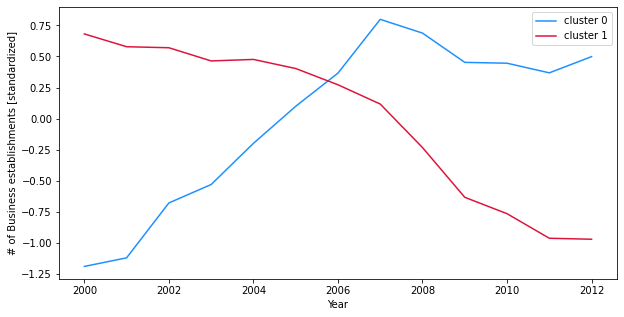

In [ ]:
# -- plot the cluster centers
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(years, clustercenter0.T, color='dodgerblue')
ax.plot(years, clustercenter1.T, color='crimson')
ax.set_xlabel("Year")
ax.set_ylabel("# of Business establishments [standardized]")
ax.legend(["cluster 0", "cluster 1"])
fig.show()

**Figure 7** above plots the KNN cluster of 2 for our full US business zip code patterns with 2 clusters. Overall, cluster 0 shown in blue has clearly picked up on a linear trend of increased business establishment presecne across US zip codes which then dropped off and stagnated after the great recession hit. Meanwhile, cluster 1 shown in crimson picked up a a trend of US zipcodes that have had declining number of business establishments over time across the range of our time period under study. 

<b> Extract the latitude and longitude of the US zipcodes from the original dataframe and make a scatter plot of the longitude (x) and latitude (y) values with the following characteristics:
 
  1. set the figsize to be square (15x15)
  2. set the facecolor of the axis to be lightgray
  3. set the markersize to be 2
  4. set the zipcodes that are labeled as being in cluster 0 to be dodgerblue in color
  5. set the zipcodes that are labeled as being in cluster 1 to be crimson in color
  6. set the alpha values of the points to be 0.5
  7. set the axis xlims to be -130 to -65
  8. set the axis ylims to be 20 to 60

  
 </b>

In [ ]:
lon = FinalUSzip['longitude']
lat = FinalUSzip['latitude']

<b> What can you say about where the number of business saw a period of increase prior to 2008 vs where the number of businesses have been steadily declining since 2000? </b>

---

In [ ]:
cluster00 = km.labels_ == 0 
cluster00lat = lat[cluster00]
cluster00lon = lon[cluster00]



In [ ]:
cluster11 = km.labels_ == 1 
cluster11_lat = lat[cluster11]
cluster11_lon = lon[cluster11]
cluster11_lat

0        42.062555
1        42.374901
5        42.184300
6        42.209529
8        42.296581
           ...    
31599    55.981117
31600    55.557671
31601    55.127000
31602    56.250473
31603    56.362775
Name: latitude, Length: 16119, dtype: float64

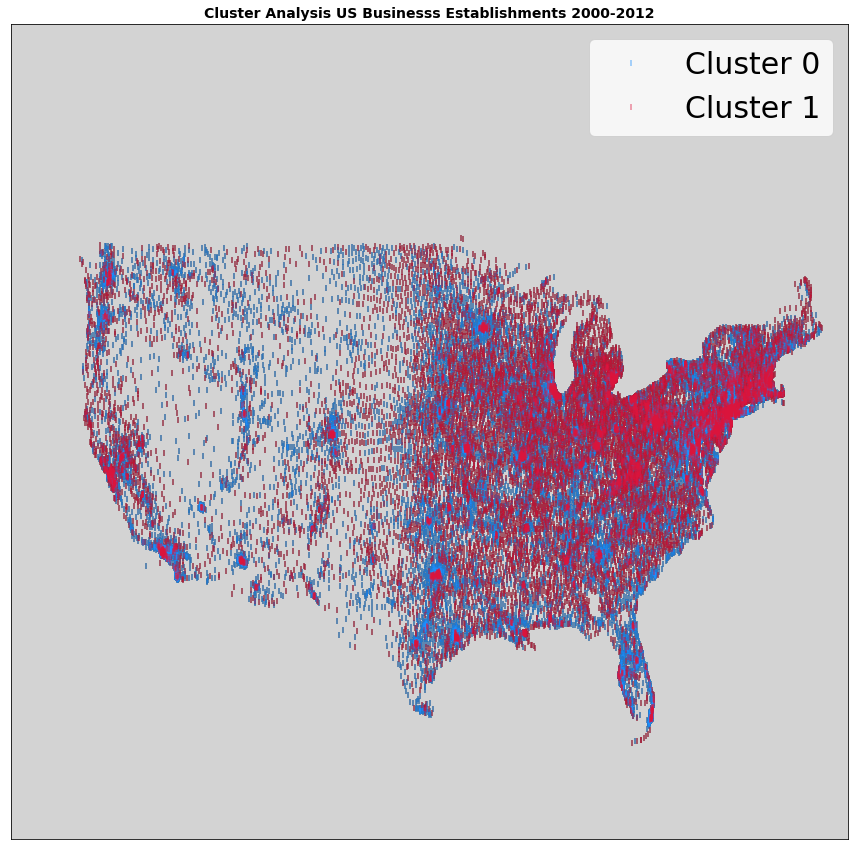

In [ ]:

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(lon, lat, marker=2, color='black', alpha=0.5)
#ax.scatter(c0lon, c0lat, color="dodgerblue", alpha=0.5, marker=2, label = 'Cluster 0')
ax.scatter(cluster00lon, cluster00lat, color="dodgerblue", alpha=0.5, marker=2, label = 'Cluster 0')

ax.scatter(cluster11_lon, cluster11_lat, color='crimson', alpha=0.5, marker=2, label = 'Cluster 1')
ax.legend(prop={"size":30})

  #ax.scatter(years, km.cluster_centers_[cnum], c="r")
ax.set_title("Cluster Analysis US Businesss Establishments 2000-2012", weight='bold', fontsize=14)
ax.set_xlim([-130, -65])
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([20, 60])
  
ax.set_facecolor('lightgray')

  
ax.set_xlabel("")
ax.set_ylabel("")
fig.show()




**Figure 8** above plots a cluster analsyis for the years 2000 to 2012 of US business establishments across US zip codes into their respective groupings. Cluster 0 is plotted in dodgerblue while cluster 1 is plotted in crimson red. Overall, figure 8 tells a story of heterogeniety for new business establishments across the US over time and space. 

**What can you say about where the number of business saw a period of increase prior to 2008 vs where the number of businesses have been steadily declining since 2000?**

Overall, from figure 8, we can say that across the United States -- there was an increase in business prior to the year 2008 as represented by cluster 0 in blue that appeared to largely be occuring throuhgout the mid-western region and the US South, along with sparse areas of the US West. On the other hand, the number of businesses hae been steadliy declining since 2000 as shown by the red dots in figure 8 for cluster 1. This tells us a story that ever since the dotcom crash and 9/11 happened including through the great recession of 2008 and beyond as well -- that by and large the US Northeast -- once the maunfacturing power of the US -- has continued to lose business while new business increased steadily in morer rural regions of the US as shown via the blue cluster where Texas appears to have become a big winner. 

However, it appears that once the great recession hit of 2008 -- the number of new business establishments and increase in business has stagnated across the US (cluster 0 in blue) or has steepend the decline (cluster 1 in red) suggesting that the great recession has had permanent scarring effects on the US economy in terms of new business establishment formation -- a very worrying fact. 

In thinking about these findings from a more macro persepctive -- we see eononomic power shifting away from the US Northeast and more towards rural regions of the US -- that are often Republican led states -- suggesting to us a shift in political power will occur for these states as well. 

### **EXTRA CREDIT: choosing *k* for NYC**

<b> Use the "elbow method" to determine an appropriate value for k for NYC.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans




In [ ]:
fname = "/content/drive/MyDrive/mlpp22/data/zbp/nyc_zbp_est_total_2000_2012_clean.csv"
zip1 = pd.read_csv(fname)


In [ ]:
cols = zip1.columns[1:14]
zip_np = zip1[cols].values
zip_np

array([[7317, 7188, 7141, ..., 7241, 7227, 7235],
       [2277, 2543, 2269, ..., 2872, 2912, 2954],
       [3683, 3602, 3616, ..., 4113, 4159, 4214],
       ...,
       [  79,   89,   94, ...,  132,  131,  129],
       [ 288,  301,  302, ...,  330,  326,  326],
       [  39,   40,   37, ...,   48,   46,   49]])

In [ ]:
# -- now let's standardize features
zip_np_st = (zip_np - zip_np.mean(axis=1, keepdims=True)) / zip_np.std(axis=1, keepdims=True)
zip_np_st

array([[ 0.16133494, -0.85964129, -1.23162487, ..., -0.44017043,
        -0.55097405, -0.4876577 ],
       [-1.68710279, -0.44529746, -1.72445032, ...,  1.09061967,
         1.27735731,  1.47343184],
       [-1.09431562, -1.4806094 , -1.41384257, ...,  0.95637976,
         1.17575647,  1.43805472],
       ...,
       [-1.67294227, -1.11242037, -0.83215943, ...,  1.29782377,
         1.24177158,  1.1296672 ],
       [-1.96866513, -0.99868143, -0.9240673 , ...,  1.16512834,
         0.86667182,  0.86667182],
       [-1.36459632, -1.13420993, -1.8253691 , ...,  0.70888121,
         0.24810842,  0.9392676 ]])

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(zip_np_st)
    distortions.append(kmeanModel.inertia_)

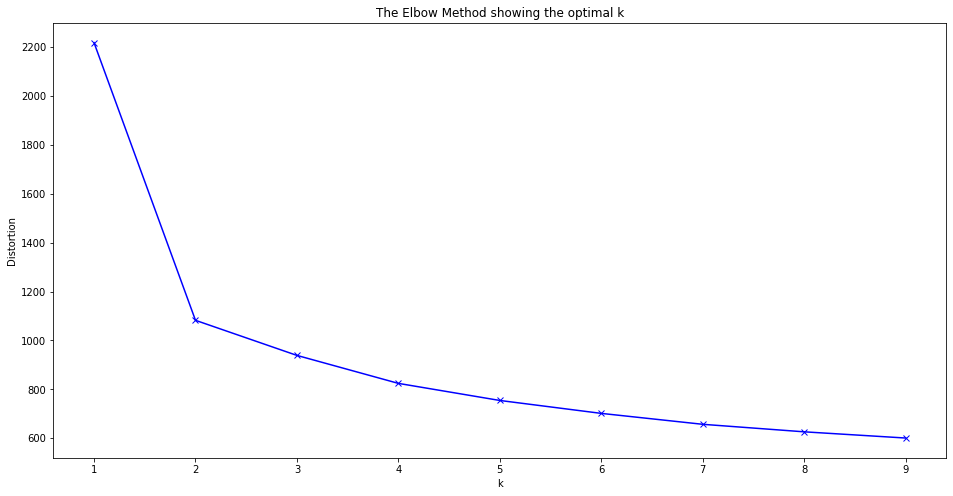

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the “elbow” is the number 2 which is optimal for this case. Thus -- our elbow method analysis suggests we should be using a **K of 2** for the NYC data. This makes sense given that the 4 clusters that we plotted originally for the NYC data were widely varying in terms of how many members appeared in each cluster with one cluster in particular carrying an overhwelming amount of the members with it relative to the other clusters. A K of 2 provides a better fit here if we were to reconduct the anlaysis according to our elbow method to find the opitmal K.  